<h2>Multilayer Perceptron Network</h2> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split

sns.set(style='ticks', palette = 'Spectral', font_scale=1.5)
rcParams['figure.figsize'] = 16, 8
random_state = 42
np.random.seed(random_state)
tf.set_random_seed(random_state)

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,subred_num
0,1.022503,9.263481,7.196661,0.713737,-10.198532,-5.373705,6.329010,-11.324772,22.767520,6.896969,...,3.639935,-10.124123,13.274714,-8.389603,-6.505627,6.343185,-17.560234,-2.442932,3.079132,0
1,-0.323867,7.722980,12.684483,32.433552,-16.988693,-10.869745,4.093761,-28.068019,25.313713,20.590340,...,8.180832,-23.305218,0.471176,-14.555885,-25.838142,2.277317,-25.614525,15.118515,2.317825,0
2,77.467317,113.915773,65.519438,245.179375,-94.565128,-109.999386,93.734236,-87.885499,257.730162,121.020763,...,-58.143604,-146.690353,34.986722,-84.497543,-77.428837,90.276260,-132.698345,64.056031,158.318733,0
3,0.672150,8.860280,6.773788,5.557095,-13.995350,-1.298798,14.855133,-13.880474,26.359550,16.415405,...,-5.279045,-10.628357,10.426218,-11.863808,-10.780058,0.959249,-18.345068,6.968060,6.299683,0
4,-0.122070,-0.461533,-1.217285,2.936523,-2.079285,2.565628,3.502319,-0.293793,4.122253,1.102203,...,-0.417969,-0.977966,-1.018799,1.823914,-2.710815,0.975128,-4.760040,-0.759163,0.799683,0


Generate dummy variables for outcomes

In [3]:
df=df.join(pd.get_dummies(df['subred_num'], prefix='sub_'))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,subred_num,sub__0,sub__1,sub__2
0,1.022503,9.263481,7.196661,0.713737,-10.198532,-5.373705,6.329010,-11.324772,22.767520,6.896969,...,-8.389603,-6.505627,6.343185,-17.560234,-2.442932,3.079132,0,1,0,0
1,-0.323867,7.722980,12.684483,32.433552,-16.988693,-10.869745,4.093761,-28.068019,25.313713,20.590340,...,-14.555885,-25.838142,2.277317,-25.614525,15.118515,2.317825,0,1,0,0
2,77.467317,113.915773,65.519438,245.179375,-94.565128,-109.999386,93.734236,-87.885499,257.730162,121.020763,...,-84.497543,-77.428837,90.276260,-132.698345,64.056031,158.318733,0,1,0,0
3,0.672150,8.860280,6.773788,5.557095,-13.995350,-1.298798,14.855133,-13.880474,26.359550,16.415405,...,-11.863808,-10.780058,0.959249,-18.345068,6.968060,6.299683,0,1,0,0
4,-0.122070,-0.461533,-1.217285,2.936523,-2.079285,2.565628,3.502319,-0.293793,4.122253,1.102203,...,1.823914,-2.710815,0.975128,-4.760040,-0.759163,0.799683,0,1,0,0


([<matplotlib.patches.Wedge at 0x2371c757828>,
 [Text(0.3260709086284462, 1.0505606896063737, '1'),
  Text(-0.9185370500890002, -0.6052187105615603, '0'),
  Text(0.8502974186600647, -0.697849768804168, '2')],
 [Text(0.17785685925187972, 0.5730331034216584, '40.4%'),
  Text(-0.5010202091394546, -0.33011929666994194, '37.7%'),
  Text(0.4637985919963989, -0.3806453284386371, '21.9%')])

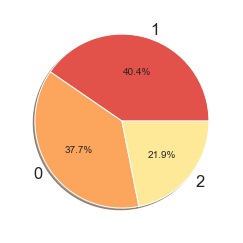

In [5]:
type_values = df['subred_num'].value_counts()
sizes = type_values.values
labels = type_values.index.values
plt.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%')

In [6]:
#feature vec dataset
X = df.iloc[:,:300]
y = df.iloc[:,-3:]
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

This function creates Multilayer perceptron network adding multiple layers<br>
https://skymind.ai/wiki/multilayer-perceptron

In [7]:
def multilayer_perceptron(x, weights, biases, keep_probs):
    #hiddent layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_probs)
    #hidden layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

Setting parameters like weights and biases for neural network. Basically weights and biases will be two dimensional matrices

In [9]:
n_hidden_1 = 64 #number of neurons in first hidden layer
n_hidden_2 = 64 #number of neurons in second hidden layer
n_input = X_train.shape[1]
n_classes = 3

weights = {
    'h1' : tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}

biases = {
    'b1' : tf.Variable(tf.random.normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random.normal([n_classes]))
}

keep_probs = tf.placeholder("float")

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
train_epochs = 200
display_step = 25
batch_size = 32

#None because number of rows could be anything(matrix multiplication would be [ ,3]*[3,32], no of columns in first and 
#no of rows in second matrix should be same..3 in this case
x = tf.placeholder("float", [None, n_input]) 
y = tf.placeholder("float", [None, n_classes])
print(y)

Tensor("Placeholder_2:0", shape=(?, 3), dtype=float32)


In [265]:
#Could also manipulate with sigmomoid
#predictions = multilayer_perceptron(x, weights, biases, keep_probs)
#cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions, labels=y))
#optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [11]:
#softmax entropy
predictions = multilayer_perceptron(x, weights, biases, keep_probs)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(train_epochs):
        avg_cost = 0.0
        total_batch = int(len(X_train)/batch_size)
        x_batches = np.array_split(X_train, total_batch)
        y_batches = np.array_split(y_train, total_batch)
        
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                      y: batch_y, 
                                                      keep_probs: 0.8})
            
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch: ", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization finished!")
    #print(predictions)
    #print(y)
    #val = tf.nn.sigmoid(predictions)
    #correct_prediction = tf.equal(tf.round(val), y)
    correct_prediction = tf.equal(tf.argmax(predictions,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x:X_test, y:y_test, keep_probs:1.00}))
    

Epoch:  0001 cost= 8921.188714600
Epoch:  0026 cost= 799.661475754
Epoch:  0051 cost= 207.061592329
Epoch:  0076 cost= 25.568273021
Epoch:  0101 cost= 7.108320580
Epoch:  0126 cost= 9.911028829
Epoch:  0151 cost= 3.079650465
Epoch:  0176 cost= 3.004612423
Optimization finished!
Accuracy: 0.4265241
